# 1. Import packages

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings

# 2. Load the Web Scrapped Data

In [2]:
df = pd.read_csv('cleaned_udemy_data_9k_v3.csv')

# 3. View the Data

In [3]:
df.head()

,Unnamed: 0,title,description,price,rating,reviews,discount,trainer,total_hours,total_lectures,level
0,0,Learn Ethical Hacking From Scratch,Become an ethical hacker that can hack compute...,17.99,4.6,98659,99.99,Zaid Sabih,15.5,143,All Levels
1,1,Ultimate AWS Certified Solutions Architect Ass...,Pass the AWS Certified Solutions Architect Ass...,15.99,4.7,95644,89.99,Stephane Maarek,27.0,368,All Levels
2,2,[NEW] Ultimate AWS Certified Cloud Practitione...,Pass the Amazon Web Services Certified Cloud P...,14.99,4.7,61639,84.99,Stephane Maarek,14.0,252,Beginner
3,3,TOTAL: CompTIA A+ Certification (220-1001).,Course 1: Everything you need to pass the A+ C...,20.99,4.7,48503,119.99,Total Seminars,17.5,131,Beginner
4,4,Ultimate AWS Certified Developer Associate 202...,Become an AWS Certified Developer! Learn all A...,14.99,4.7,47458,89.99,Stephane Maarek,32.5,428,All Levels


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8228 entries, 0 to 8227
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8228 non-null   int64  
 1   title           8228 non-null   object 
 2   description     8228 non-null   object 
 3   price           8228 non-null   float64
 4   rating          8228 non-null   float64
 5   reviews         8228 non-null   int64  
 6   discount        8228 non-null   float64
 7   trainer         8225 non-null   object 
 8   total_hours     8228 non-null   float64
 9   total_lectures  8228 non-null   int64  
 10  level           8228 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 707.2+ KB


In [5]:
df.drop(columns='Unnamed: 0',inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8228 entries, 0 to 8227
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           8228 non-null   object 
 1   description     8228 non-null   object 
 2   price           8228 non-null   float64
 3   rating          8228 non-null   float64
 4   reviews         8228 non-null   int64  
 5   discount        8228 non-null   float64
 6   trainer         8225 non-null   object 
 7   total_hours     8228 non-null   float64
 8   total_lectures  8228 non-null   int64  
 9   level           8228 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 642.9+ KB


In [7]:
df.isnull().sum()

title             0
description       0
price             0
rating            0
reviews           0
discount          0
trainer           3
total_hours       0
total_lectures    0
level             0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
#df.group price.unique() 


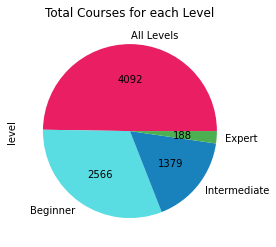

In [10]:
states = df['level'].value_counts()
colors = ['#e91e63','#59dce2','#1982bc','#4caf50']
states.plot.pie(autopct=lambda x: '{:.0f}'.format(x*states.sum()/100), colors = colors ) 
plt.title('Total Courses for each Level');

In [11]:
df_level = df['level']

In [12]:
set(df_level)

{'All Levels', 'Beginner', 'Expert', 'Intermediate'}

In [13]:
df_level = pd.get_dummies(df_level, drop_first=False)

In [14]:
df_level

,All Levels,Beginner,Expert,Intermediate
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
8223,0,0,0,1
8224,1,0,0,0
8225,0,0,0,1
8226,1,0,0,0


In [15]:
df

,title,description,price,rating,reviews,discount,trainer,total_hours,total_lectures,level
0,Learn Ethical Hacking From Scratch,Become an ethical hacker that can hack compute...,17.99,4.6,98659,99.99,Zaid Sabih,15.5,143,All Levels
1,Ultimate AWS Certified Solutions Architect Ass...,Pass the AWS Certified Solutions Architect Ass...,15.99,4.7,95644,89.99,Stephane Maarek,27.0,368,All Levels
2,[NEW] Ultimate AWS Certified Cloud Practitione...,Pass the Amazon Web Services Certified Cloud P...,14.99,4.7,61639,84.99,Stephane Maarek,14.0,252,Beginner
3,TOTAL: CompTIA A+ Certification (220-1001).,Course 1: Everything you need to pass the A+ C...,20.99,4.7,48503,119.99,Total Seminars,17.5,131,Beginner
4,Ultimate AWS Certified Developer Associate 202...,Become an AWS Certified Developer! Learn all A...,14.99,4.7,47458,89.99,Stephane Maarek,32.5,428,All Levels
...,...,...,...,...,...,...,...,...,...,...
8223,Reverse Engineering Deep Dive,"Deobfuscations, disassembly, shellcode analysi...",14.99,3.6,7,89.99,Cristina Gheorghisan,6.0,36,Intermediate
8224,Achieving NSA level privacy,This course will help you to be totally anonym...,14.99,5.0,7,49.99,Lakshay arora,1.0,16,All Levels
8225,Migrating a DFS-R Deployment to Azure File Sync,How to Deploy Azure File Sync and Migrate from...,14.99,4.5,7,19.99,Thomas Mitchell,1.0,18,Intermediate
8226,Internet of Things (IoT) Fundamentals Certific...,Become an IoT Engineer / Product Manager. Lear...,14.99,3.2,7,19.99,Uplatz Training,11.0,17,All Levels


In [16]:
udemy = pd.concat([df,df_level],axis=1)

In [17]:
udemy

,title,description,price,rating,reviews,discount,trainer,total_hours,total_lectures,level,All Levels,Beginner,Expert,Intermediate
0,Learn Ethical Hacking From Scratch,Become an ethical hacker that can hack compute...,17.99,4.6,98659,99.99,Zaid Sabih,15.5,143,All Levels,1,0,0,0
1,Ultimate AWS Certified Solutions Architect Ass...,Pass the AWS Certified Solutions Architect Ass...,15.99,4.7,95644,89.99,Stephane Maarek,27.0,368,All Levels,1,0,0,0
2,[NEW] Ultimate AWS Certified Cloud Practitione...,Pass the Amazon Web Services Certified Cloud P...,14.99,4.7,61639,84.99,Stephane Maarek,14.0,252,Beginner,0,1,0,0
3,TOTAL: CompTIA A+ Certification (220-1001).,Course 1: Everything you need to pass the A+ C...,20.99,4.7,48503,119.99,Total Seminars,17.5,131,Beginner,0,1,0,0
4,Ultimate AWS Certified Developer Associate 202...,Become an AWS Certified Developer! Learn all A...,14.99,4.7,47458,89.99,Stephane Maarek,32.5,428,All Levels,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8223,Reverse Engineering Deep Dive,"Deobfuscations, disassembly, shellcode analysi...",14.99,3.6,7,89.99,Cristina Gheorghisan,6.0,36,Intermediate,0,0,0,1
8224,Achieving NSA level privacy,This course will help you to be totally anonym...,14.99,5.0,7,49.99,Lakshay arora,1.0,16,All Levels,1,0,0,0
8225,Migrating a DFS-R Deployment to Azure File Sync,How to Deploy Azure File Sync and Migrate from...,14.99,4.5,7,19.99,Thomas Mitchell,1.0,18,Intermediate,0,0,0,1
8226,Internet of Things (IoT) Fundamentals Certific...,Become an IoT Engineer / Product Manager. Lear...,14.99,3.2,7,19.99,Uplatz Training,11.0,17,All Levels,1,0,0,0


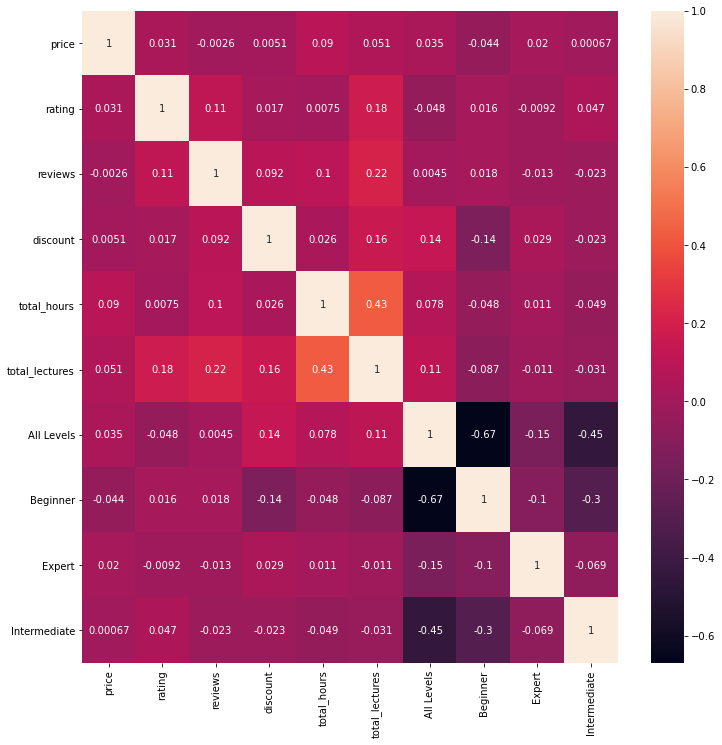

In [18]:
corr = udemy.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot = True);

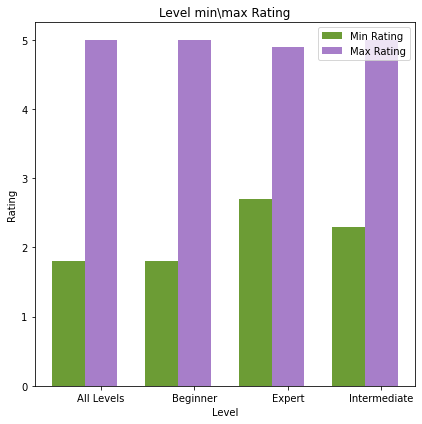

In [19]:
levels=['All Levels', 'Beginner', 'Expert', 'Intermediate']

Course_min_Rating=[]
Course_max_Rating=[]

for level in levels:
    Course_max_Rating.append(max(udemy[udemy['level']== level]['rating']))
    Course_min_Rating.append(min(udemy[udemy['level']== level]['rating']))
    
#months = iHerb['Category']
n_groups = 4
means_frank = Course_min_Rating
means_guido = Course_max_Rating

# create plot
fig, ax = plt.subplots(figsize=(6,6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='#478402',
label='Min Rating')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='#915ebc',
label='Max Rating')
plt.xlabel('Level')
plt.ylabel('Rating')
plt.title('Level min\max Rating')


plt.xticks(index + bar_width,levels)

plt.legend()
plt.tight_layout()
plt.show() 

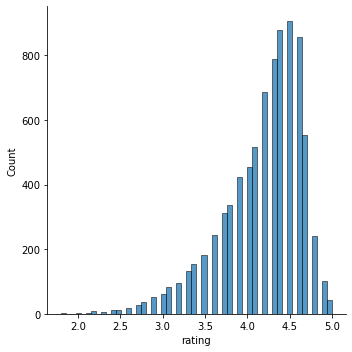

In [20]:
sns.displot(df.rating) 

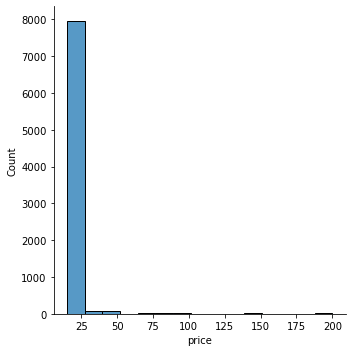

In [21]:
sns.displot(df.price);

course_level=udemy['level']
course_rating=udemy['rating']
    
new_df = pd.DataFrame({
    'course_level':course_level,
    'course_rating':course_rating
})
fig, ax = plt.subplots(figsize=(15,7))
sns.swarmplot(x="course_level", y="course_rating", data=new_df,size=15)

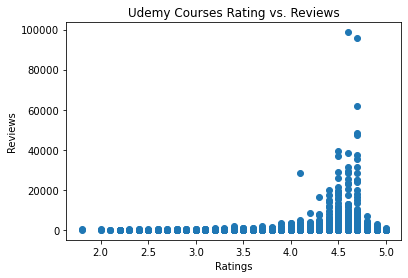

In [22]:
plt.scatter(udemy['rating'], udemy['reviews'])
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Udemy Courses Rating vs. Reviews')
plt.xlabel('Ratings')
plt.ylabel('Reviews')
plt.show() 

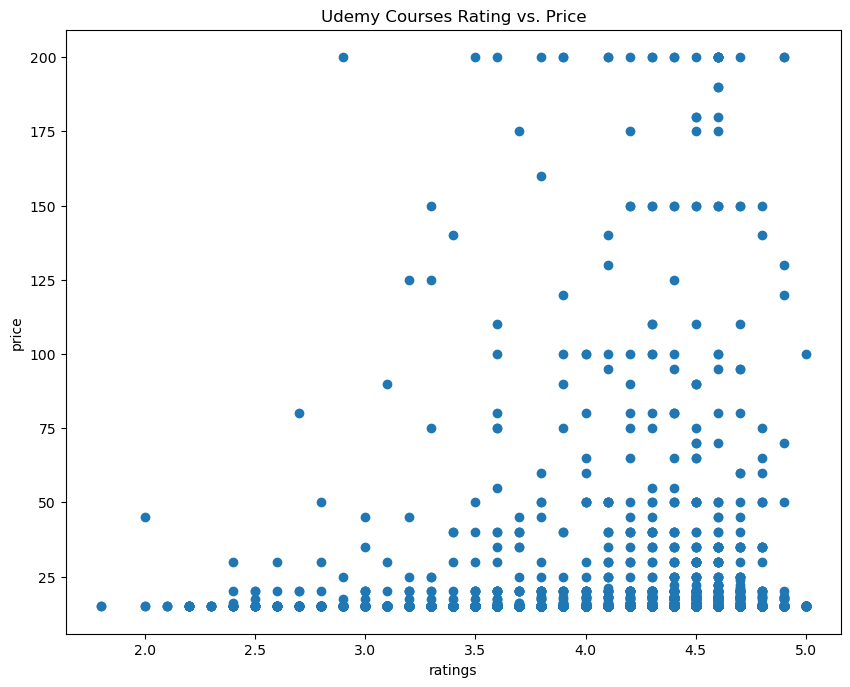

In [23]:
plt.scatter(udemy['rating'], udemy['price'])
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Udemy Courses Rating vs. Price')
plt.xlabel('ratings')
plt.ylabel('price')
plt.show()

In [24]:
df

,title,description,price,rating,reviews,discount,trainer,total_hours,total_lectures,level
0,Learn Ethical Hacking From Scratch,Become an ethical hacker that can hack compute...,17.99,4.6,98659,99.99,Zaid Sabih,15.5,143,All Levels
1,Ultimate AWS Certified Solutions Architect Ass...,Pass the AWS Certified Solutions Architect Ass...,15.99,4.7,95644,89.99,Stephane Maarek,27.0,368,All Levels
2,[NEW] Ultimate AWS Certified Cloud Practitione...,Pass the Amazon Web Services Certified Cloud P...,14.99,4.7,61639,84.99,Stephane Maarek,14.0,252,Beginner
3,TOTAL: CompTIA A+ Certification (220-1001).,Course 1: Everything you need to pass the A+ C...,20.99,4.7,48503,119.99,Total Seminars,17.5,131,Beginner
4,Ultimate AWS Certified Developer Associate 202...,Become an AWS Certified Developer! Learn all A...,14.99,4.7,47458,89.99,Stephane Maarek,32.5,428,All Levels
...,...,...,...,...,...,...,...,...,...,...
8223,Reverse Engineering Deep Dive,"Deobfuscations, disassembly, shellcode analysi...",14.99,3.6,7,89.99,Cristina Gheorghisan,6.0,36,Intermediate
8224,Achieving NSA level privacy,This course will help you to be totally anonym...,14.99,5.0,7,49.99,Lakshay arora,1.0,16,All Levels
8225,Migrating a DFS-R Deployment to Azure File Sync,How to Deploy Azure File Sync and Migrate from...,14.99,4.5,7,19.99,Thomas Mitchell,1.0,18,Intermediate
8226,Internet of Things (IoT) Fundamentals Certific...,Become an IoT Engineer / Product Manager. Lear...,14.99,3.2,7,19.99,Uplatz Training,11.0,17,All Levels


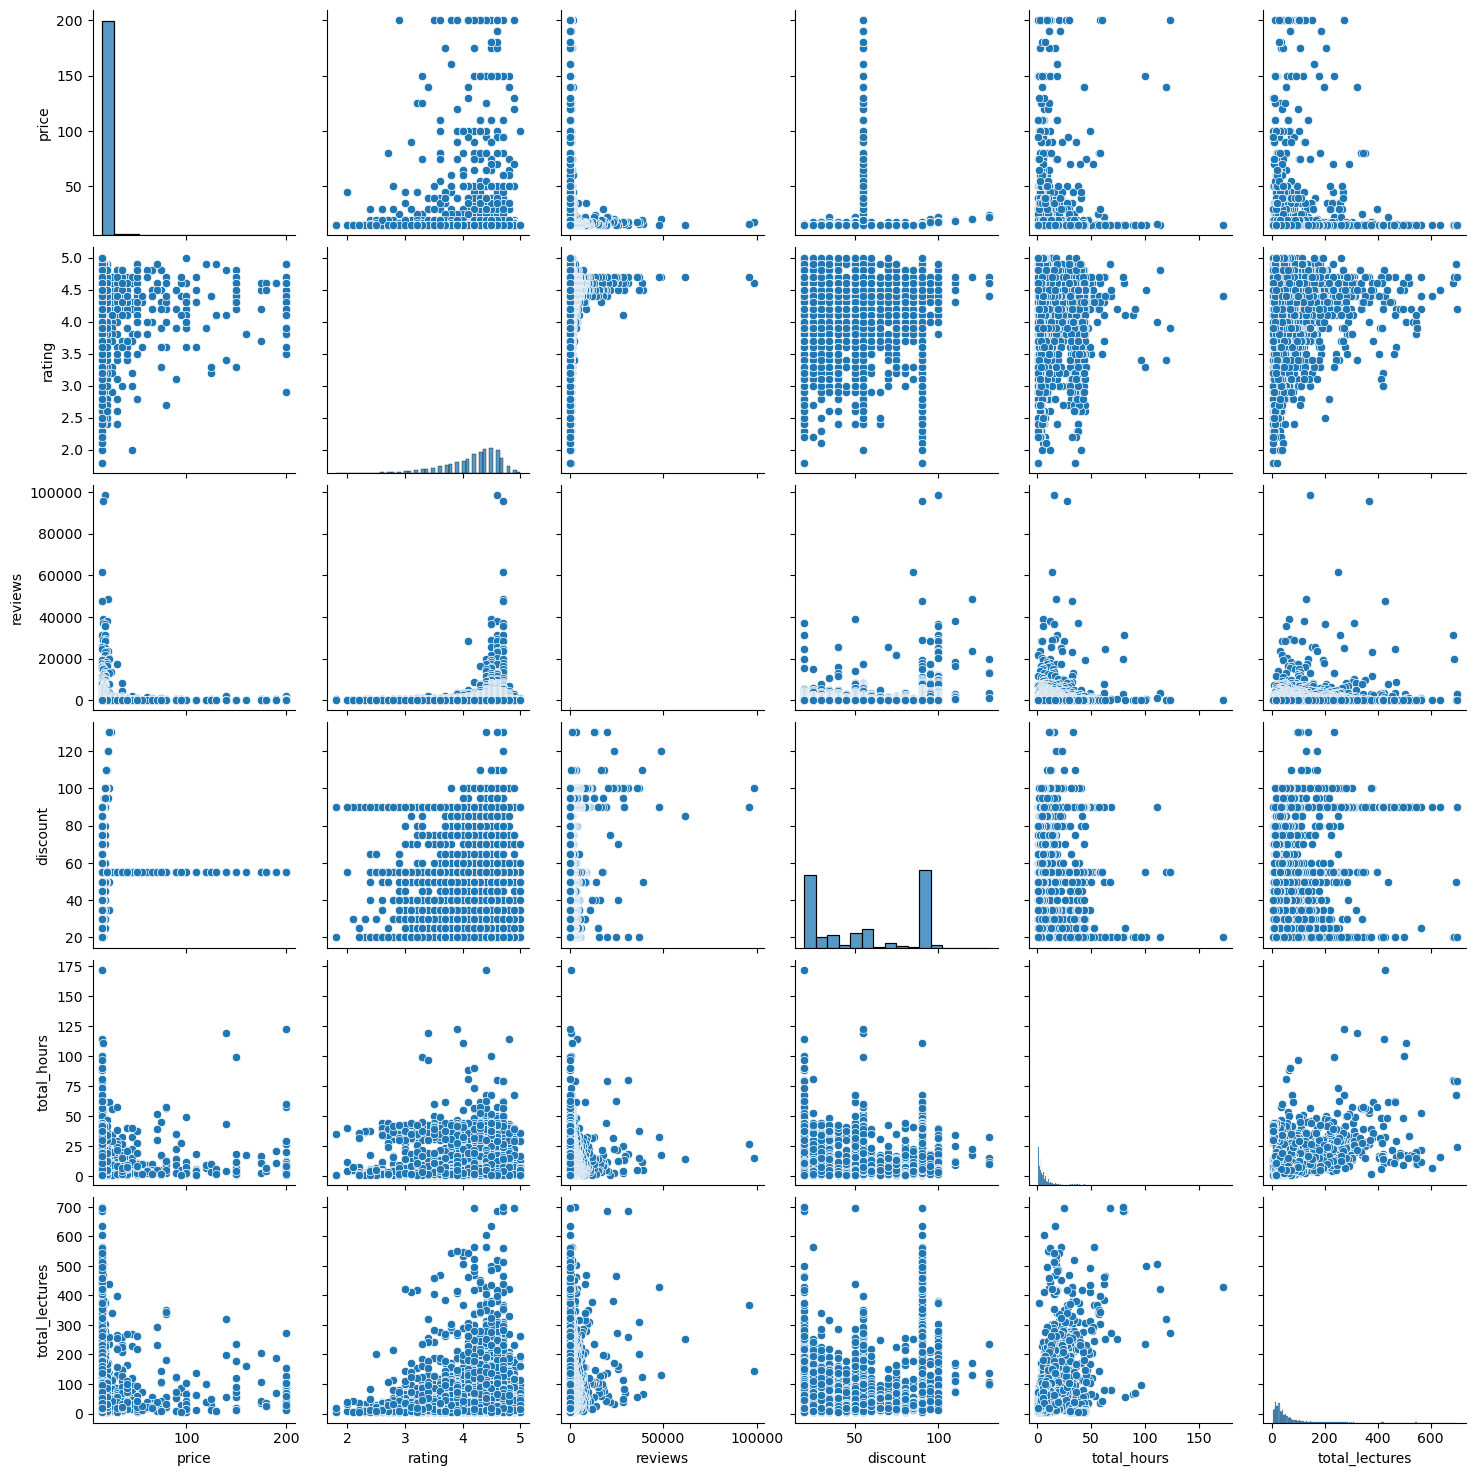

In [25]:
sns.pairplot(df)

In [26]:
udemy.describe()

,price,rating,reviews,discount,total_hours,total_lectures,All Levels,Beginner,Expert,Intermediate
count,8225.000000,8225.000000,8225.000000,8225.000000,8225.000000,8225.000000,8225.000000,8225.000000,8225.000000,8225.000000
mean,17.301285,4.173666,481.024438,54.917463,7.899453,53.516717,0.497508,0.311976,0.022857,0.167660
std,15.037332,0.475191,2623.863570,30.190875,10.254257,62.073145,0.500024,0.463328,0.149457,0.373586
min,14.990000,1.800000,7.000000,19.990000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,14.990000,3.900000,23.000000,19.990000,2.000000,19.000000,0.000000,0.000000,0.000000,0.000000
50%,14.990000,4.300000,62.000000,49.990000,4.500000,34.000000,0.000000,0.000000,0.000000,0.000000
75%,14.990000,4.500000,226.000000,89.990000,8.500000,63.000000,1.000000,1.000000,0.000000,0.000000
max,199.990000,5.000000,98659.000000,129.990000,172.000000,699.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
udemy.columns 

Index(['title', 'description', 'price', 'rating', 'reviews', 'discount',
       'trainer', 'total_hours', 'total_lectures', 'level', 'All Levels',
       'Beginner', 'Expert', 'Intermediate'],
      dtype='object')

# Target = Rating

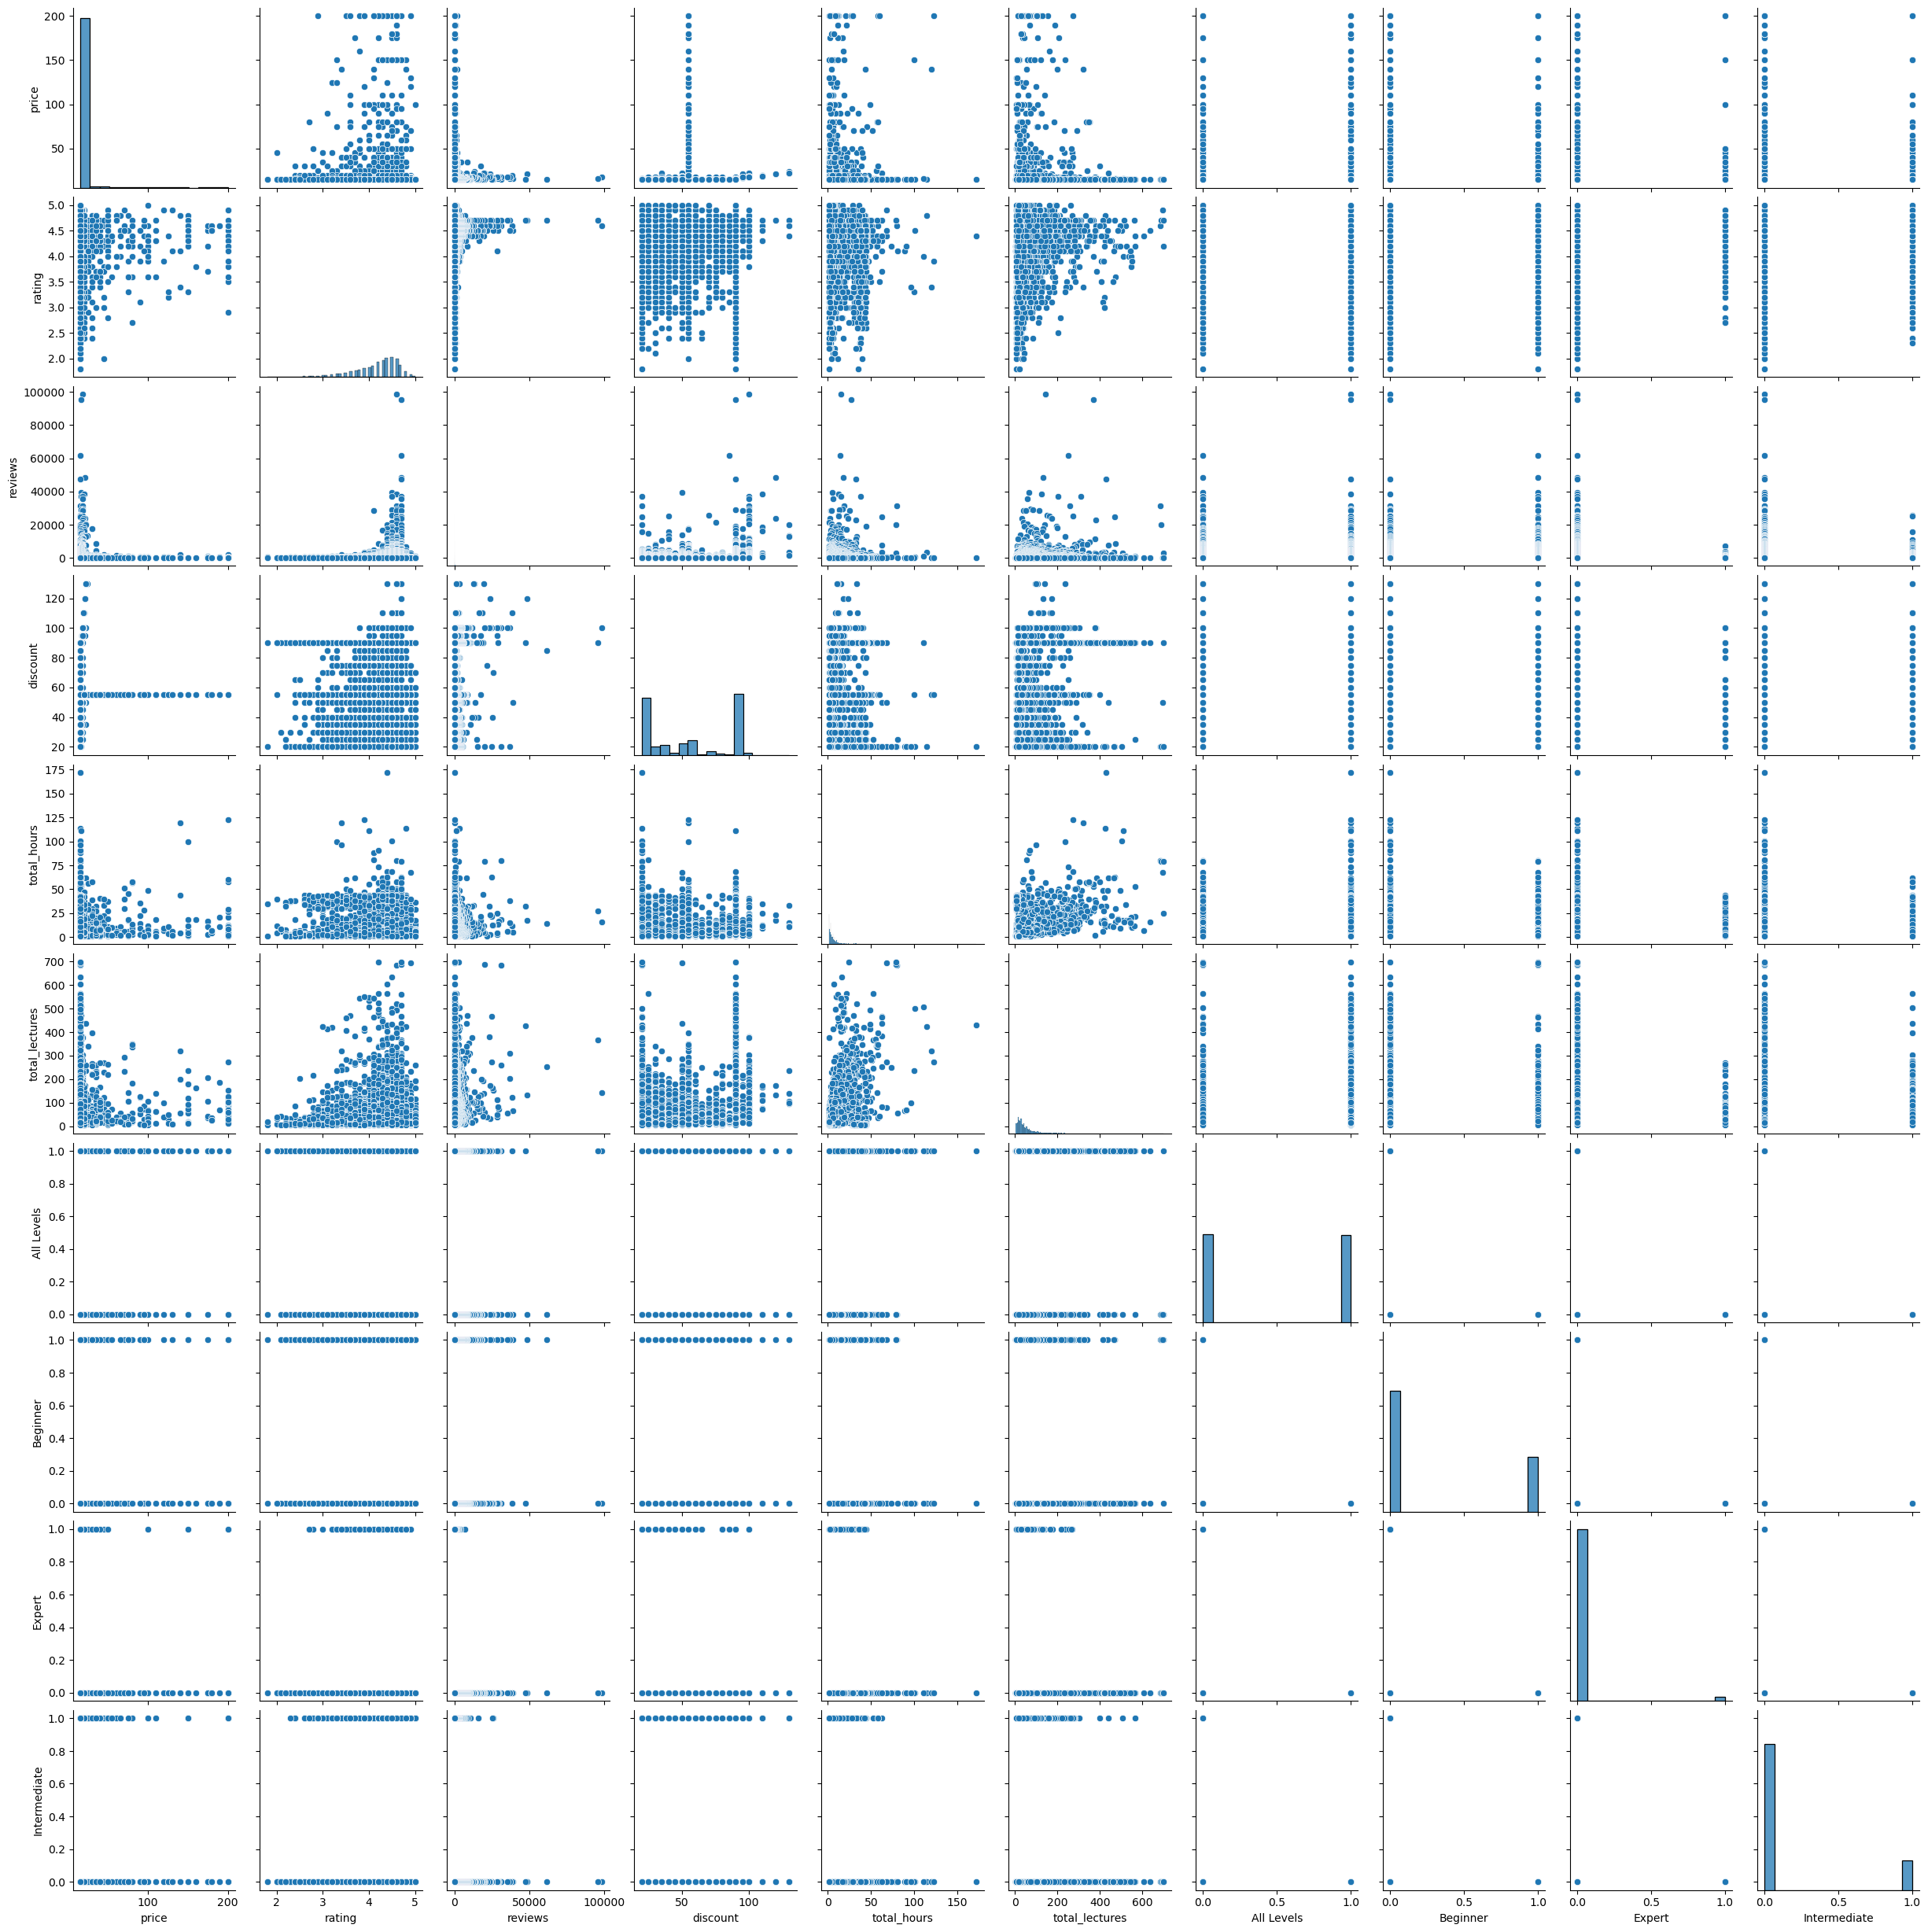

In [28]:
sns.pairplot(udemy) 

### 2. Splitting the data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(udemy[[ 'rating', 'reviews', 'total_hours', 
       'All Levels','Beginner', 'Expert', 'Intermediate']], udemy[['price']], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training Data has",X_train.shape)
print("Validation Data has",X_val.shape)
print("Training Data has",X_test.shape) 

Training Data has (5264, 7)
Validation Data has (1316, 7)
Training Data has (1645, 7)


### 2. Linear Regression Model

In [31]:
lr=LinearRegression()
lr.fit(X_train,y_train)

val = KFold(n_splits = 5)
cv_res = cross_val_score(lr,X_train,y_train,cv = val ,scoring = 'r2')

print('The R square: ',cv_res.mean())
y_pred=lr.predict(X_val)

score = r2_score(y_val,y_pred)
mse = mean_squared_error(y_pred,y_val) 

##co=lr.coef_
print("Testing accuracy: ",score)
print('Mean Squared Error: ',mse)
#print(co)

The R square:  0.00031276613657760244
Testing accuracy:  0.006798589277990041
Mean Squared Error:  202.72891456105452


#### 2.1 Select only the needed variables

In [33]:
x = udemy[[ 'price','reviews', 'total_lectures', 'discount']]
y = udemy[['rating']] 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training Data has",X_train.shape)
print("Validation Data has",X_val.shape)
print("Training Data has",X_test.shape)

Training Data has (5264, 4)
Validation Data has (1316, 4)
Training Data has (1645, 4)


In [35]:
lr=LinearRegression()
lr.fit(X_train,y_train)

val = KFold(n_splits = 5)
cv_res = cross_val_score(lr,X_train,y_train,cv = val ,scoring = 'r2')

print('The R square: ',cv_res.mean())
y_pred=lr.predict(X_val)

score = r2_score(y_val,y_pred)
mse = mean_squared_error(y_pred,y_val)

print("Testing accuracy: ",score)
print('Mean Squared Error: ',mse)

The R square:  0.03360219004369029
Testing accuracy:  0.03530610417542035
Mean Squared Error:  0.2227042383795451


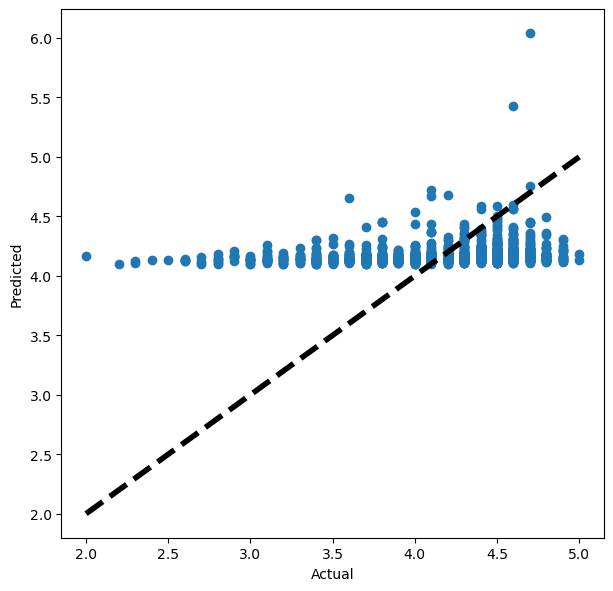

In [36]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y_val, y_pred)
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#plt.yticks(np.arange(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20))

plt.show()

### 2. Polynomial Regression

In [37]:
est = make_pipeline(PolynomialFeatures(2), LinearRegression())
est.fit(X_train, y_train)


val = KFold(n_splits = 5)
cv_res = cross_val_score(est,X_train,y_train,cv = val ,scoring = 'r2')

print('The R square: ',cv_res.mean())

y_pred = est.predict(X_val)
#score = r2_score(y_test,y_pred)
mse = mean_squared_error(y_pred,y_val)

#print("R square: ",score)
print('Mean Squared Error: ',mse)  
          

The R square:  0.04487930893729133
Mean Squared Error:  0.21608364958712234


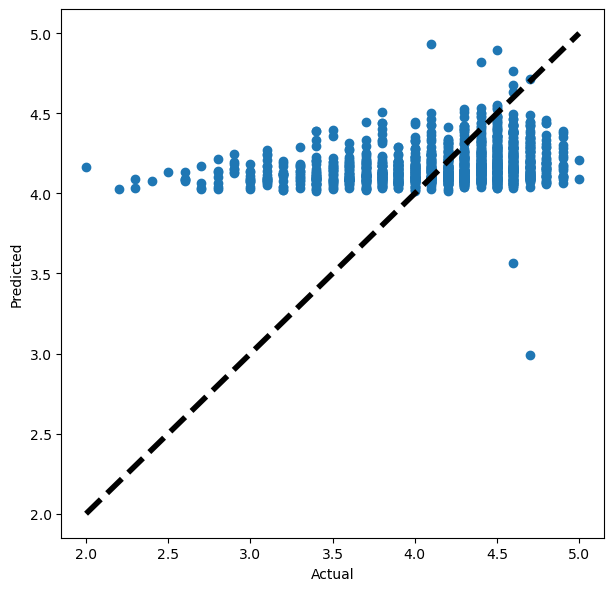

In [38]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y_val, y_pred)
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#plt.yticks(np.arange(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20))

plt.show()

### 3. Lasso & Ridge

In [39]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

kf = KFold(n_splits=5,shuffle=True, random_state=0)
params = {"alpha": np.linspace(0, 1, num=100)}
GS = GridSearchCV(Lasso(), param_grid=params, cv=kf, return_train_score=False)
GS.fit(X_train, y_train);
best_alpha = GS.best_estimator_.alpha

ls_m = Lasso(alpha=best_alpha)
ls_m.fit(X_train, y_train)

y_pred = ls_m.predict(X_val)
score = r2_score(y_val,y_pred)
mae = mean_squared_error(y_pred,y_val)

print('R square: ',score)
#print("Testing accuracy: ",score)
print('MAE: ',mae) 

R square:  0.03333432054847474
MAE:  0.2231594341393491


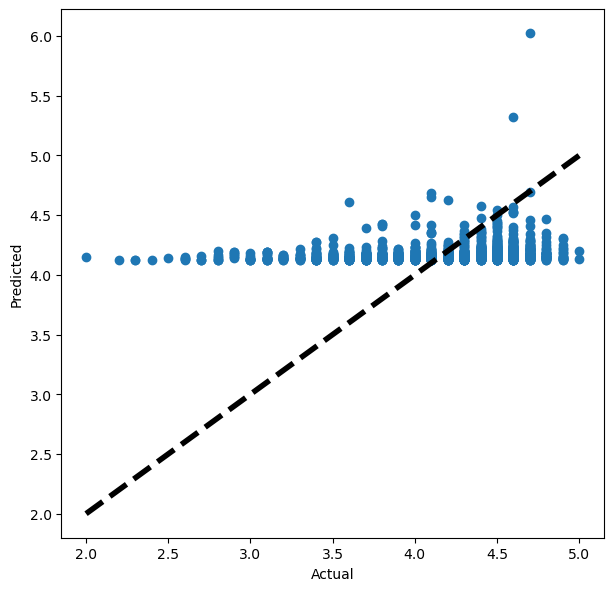

In [40]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y_val, y_pred)
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#plt.yticks(np.arange(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20))

plt.show()

In [41]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

kf = KFold(n_splits=5,shuffle=True, random_state=0)
params = {"alpha": np.linspace(0, 1, num=100)}
GS = GridSearchCV(Ridge(), param_grid=params, cv=kf, return_train_score=False)
GS.fit(X_train, y_train);
best_alpha = GS.best_estimator_.alpha

ls_m = Lasso(alpha=best_alpha)
ls_m.fit(X_train, y_train)

y_pred = ls_m.predict(X_val)
score = r2_score(y_val,y_pred)
mae = mean_squared_error(y_pred,y_val)

print('R square: ',score)
#print("Testing accuracy: ",score)
print('MAE: ',mae) 

R square:  0.031209132083770963
MAE:  0.2236500441457909


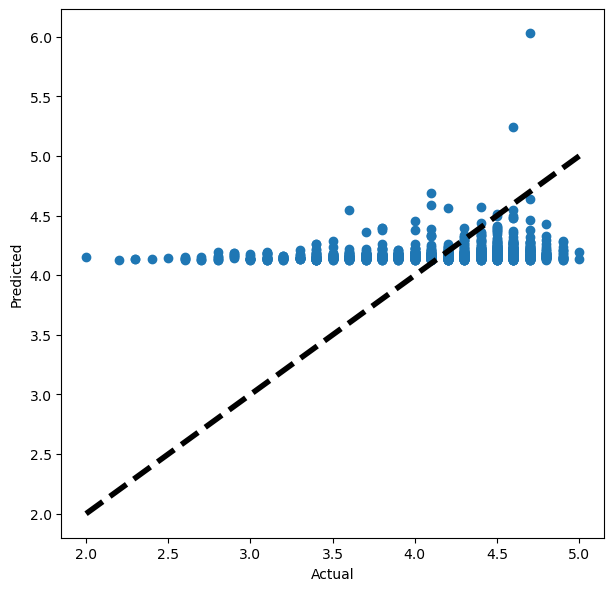

In [42]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y_val, y_pred)
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#plt.yticks(np.arange(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20))

plt.show()